# Aula 2 - Exemplo: O Perceptron e a Descida de Gradiente

**Tópico:** O Perceptron e a Descida de Gradiente.

**Objetivo:** Implementar nosso primeiro algoritmo de aprendizado.

---

Neste exemplo, vamos colocar em prática os conceitos sobre o Perceptron. Iremos construir um classificador linear (um Perceptron) do zero, usando apenas NumPy. Vamos implementar uma **Descida de Gradiente**, o algoritmo de otimização que é a base para treinar todas as redes neurais que veremos no curso, usando o erro de classificação como sinal de gradiente.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import time
from IPython import display

# Configurações de estilo para os gráficos
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'font.size': 14})

## Passo 1: Geração de Dados Linearmente Separáveis

O Perceptron tem a garantia de convergir se, e somente se, os dados forem linearmente separáveis. Portanto, vamos criar um conjunto de dados 2D simples que satisfaça essa condição.

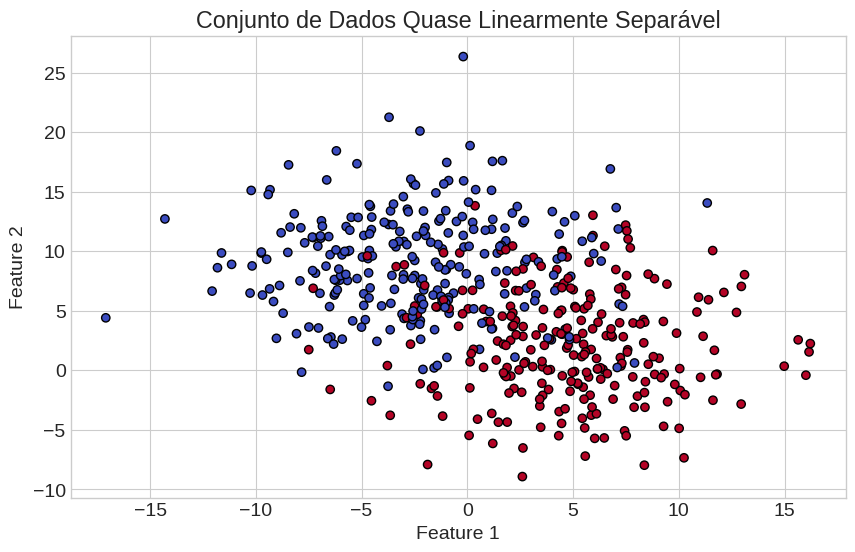

In [ ]:
# Gerar 500 amostras com 2 features, divididas em 2 classes (centros)
X, y = make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=4.5, random_state=42)

# Plotar os dados
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('Conjunto de Dados Quase Linearmente Separável')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

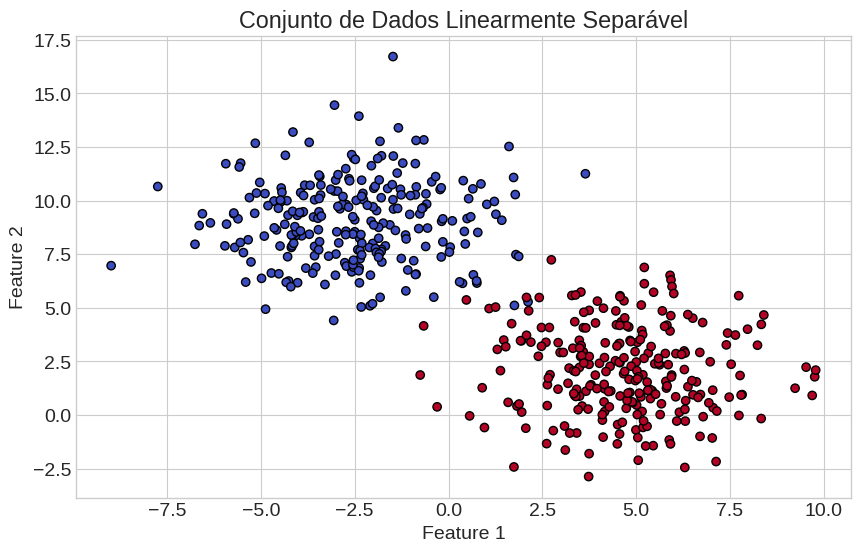

In [ ]:
# Gerar 500 amostras com 2 features, divididas em 2 classes (centros)
X, y = make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=2.0, random_state=42)

# Plotar os dados
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('Conjunto de Dados Linearmente Separável')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Passo 2: O Modelo Perceptron e a Descida de Gradiente

Nosso modelo é definido por:
1.  **Combinação Linear:** $z = \mathbf{w}^T \mathbf{x} + b$
2.  **Função de Ativação:** $ \hat{y} = \sigma(z) $ (usaremos a função degrau)

Para treinar com descida de gradiente, precisamos de:
1.  **Função de Custo:** Usaremos o Erro Quadrático Médio (MSE), $J = \frac{1}{N} \sum_{n=1}^{N} (y_n - \hat{y}_n)^2$.
2.  **Gradientes:** As derivadas parciais do custo em relação aos parâmetros $\mathbf{w}$ e $b$.
3.  **Regra de Atualização:** $ \mathbf{w} \leftarrow \mathbf{w} - \eta \nabla_{\mathbf{w}}J $ e $ b \leftarrow b - \eta \nabla_{b}J $.

In [ ]:
def step_function(z):
    return np.where(z >= 0, 1, 0)

# Inicialização dos parâmetros
np.random.seed(42)
w = np.random.rand(2) # Pesos para as 2 features
b = np.random.rand(1) # Viés

# Hiperparâmetros
learning_rate = 0.1
epochs = 100

N = len(X)
loss_history = []

# --- Loop de Treinamento ---
for epoch in range(epochs):
    # 1. Calcular a combinação linear
    z = np.dot(X, w) + b

    # 2. Aplicar a função de ativação para obter a predição
    y_hat = step_function(z)

    # 3. Calcular o erro
    error = y - y_hat

    # 4. Calcular o custo (MSE)
    loss = np.mean(error**2)
    loss_history.append(loss)

    # 5. Calcular os gradientes (derivadas do MSE)
    # O fator -1 no erro já está incluso em (y - y_hat), então não precisa do sinal negativo.
    # Para a regra de atualização, a fórmula é w = w + eta * erro * x, que é o que fazemos.
    dw = (1/N) * np.dot(X.T, error)
    db = (1/N) * np.sum(error)

    # 6. Atualizar os parâmetros
    w += learning_rate * dw
    b += learning_rate * db

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss:.4f}')

Epoch [10/100], Loss: 0.1460
Epoch [20/100], Loss: 0.1780
Epoch [30/100], Loss: 0.1920
Epoch [40/100], Loss: 0.1800
Epoch [50/100], Loss: 0.1780
Epoch [60/100], Loss: 0.1780
Epoch [70/100], Loss: 0.1960
Epoch [80/100], Loss: 0.1760
Epoch [90/100], Loss: 0.2040
Epoch [100/100], Loss: 0.1560


## Passo 3: Visualização dos Resultados

Após o treinamento, vamos visualizar duas coisas:
1.  A fronteira de decisão final que o nosso Perceptron aprendeu.
2.  A curva de custo, que deve diminuir ao longo das épocas, mostrando que o modelo está aprendendo.

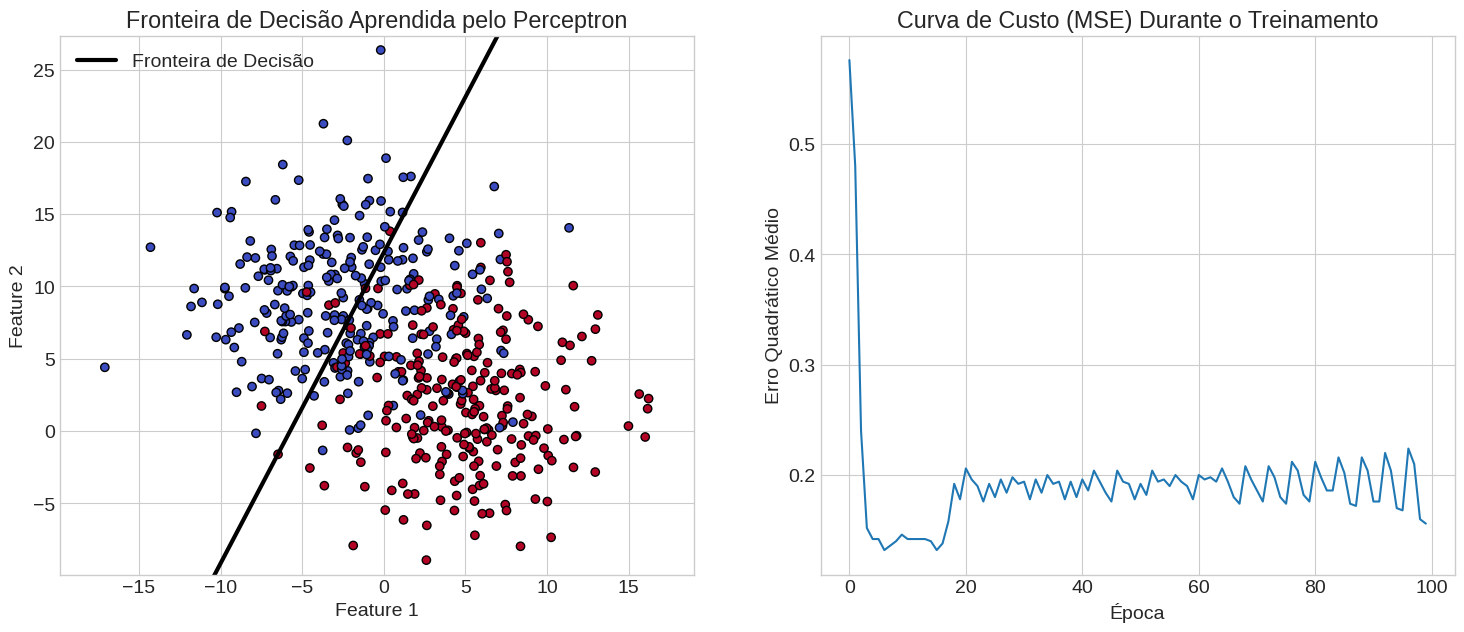

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# --- Gráfico 1: Fronteira de Decisão ---
ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

# Desenhar a linha do hiperplano: w1*x1 + w2*x2 + b = 0
# Reescrevendo: x2 = (-w1*x1 - b) / w2
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x_plot = np.linspace(x1_min, x1_max, 100)
y_plot = (-w[0] * x_plot - b) / w[1]

ax1.plot(x_plot, y_plot, 'k-', linewidth=3, label='Fronteira de Decisão')
ax1.set_title('Fronteira de Decisão Aprendida pelo Perceptron')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend()
ax1.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

# --- Gráfico 2: Curva de Custo ---
ax2.plot(range(epochs), loss_history)
ax2.set_title('Curva de Custo (MSE) Durante o Treinamento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Erro Quadrático Médio')

plt.show()

## Bônus: Animação do Aprendizado

O código abaixo (opcional) gera uma animação que mostra a fronteira de decisão se ajustando aos dados a cada época. É uma forma poderosa de visualizar o processo de aprendizado.

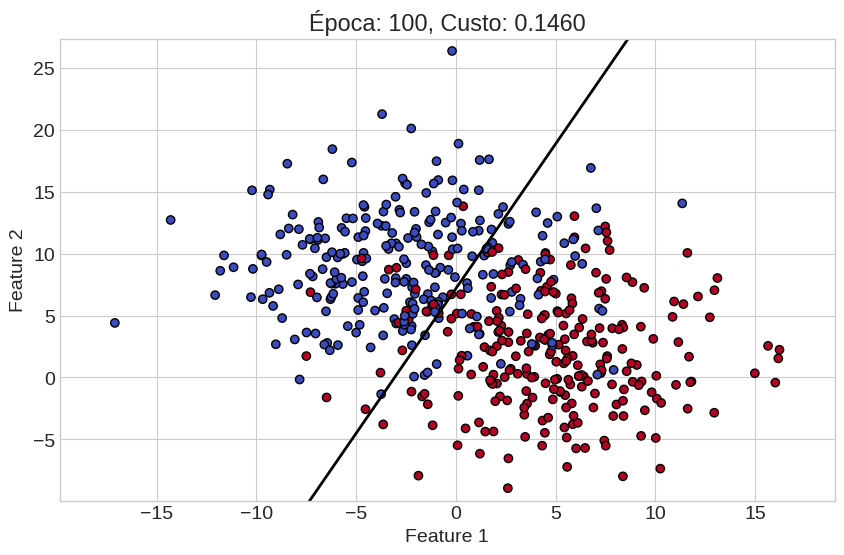

In [ ]:
# Re-inicializar os parâmetros
w_anim = np.random.rand(2)
b_anim = np.random.rand(1)

fig_anim, ax_anim = plt.subplots(figsize=(10, 6))

for epoch in range(epochs):
    z = np.dot(X, w_anim) + b_anim
    y_hat = step_function(z)
    error = y - y_hat
    loss = np.mean(error**2)

    dw = (1/N) * np.dot(X.T, error)
    db = (1/N) * np.sum(error)

    w_anim += learning_rate * dw
    b_anim += learning_rate * db

    # Atualizar o gráfico a cada 5 épocas
    if (epoch + 1) % 5 == 0:
        ax_anim.clear()
        ax_anim.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

        x_plot_anim = np.linspace(x1_min, x1_max, 100)
        y_plot_anim = (-w_anim[0] * x_plot_anim - b_anim) / w_anim[1]
        ax_anim.plot(x_plot_anim, y_plot_anim, 'k-', linewidth=2)

        ax_anim.set_title(f'Época: {epoch+1}, Custo: {loss:.4f}')
        ax_anim.set_xlabel('Feature 1')
        ax_anim.set_ylabel('Feature 2')
        ax_anim.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

        display.display(fig_anim)
        display.clear_output(wait=True)
        time.sleep(0.1)

##  O caso XOR


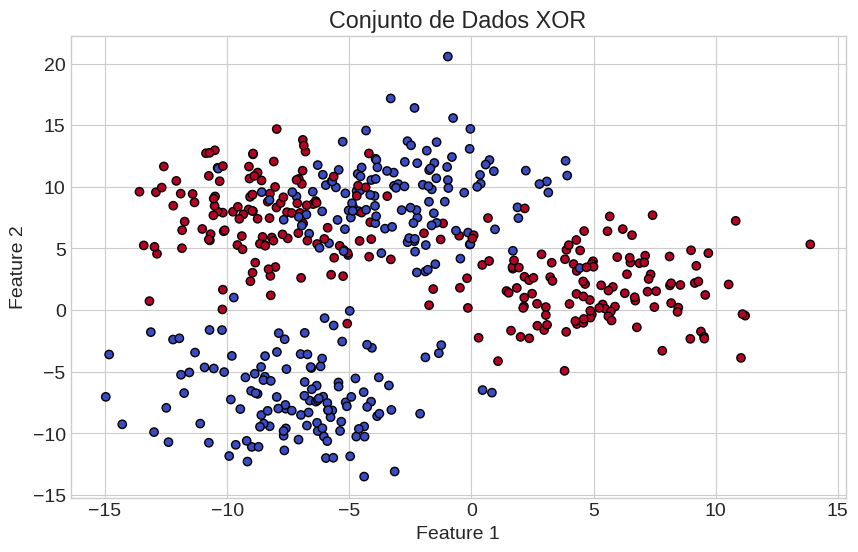

In [ ]:
# Gerar 500 amostras com 2 features, divididas em 2 classes (centros)
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=3.0, random_state=42)
y=y%2
# Plotar os dados
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('Conjunto de Dados XOR')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Epoch [10/100], Loss: 0.2900
Epoch [20/100], Loss: 0.3280
Epoch [30/100], Loss: 0.3800
Epoch [40/100], Loss: 0.3940
Epoch [50/100], Loss: 0.4100
Epoch [60/100], Loss: 0.4360
Epoch [70/100], Loss: 0.5480
Epoch [80/100], Loss: 0.5460
Epoch [90/100], Loss: 0.5480
Epoch [100/100], Loss: 0.5500


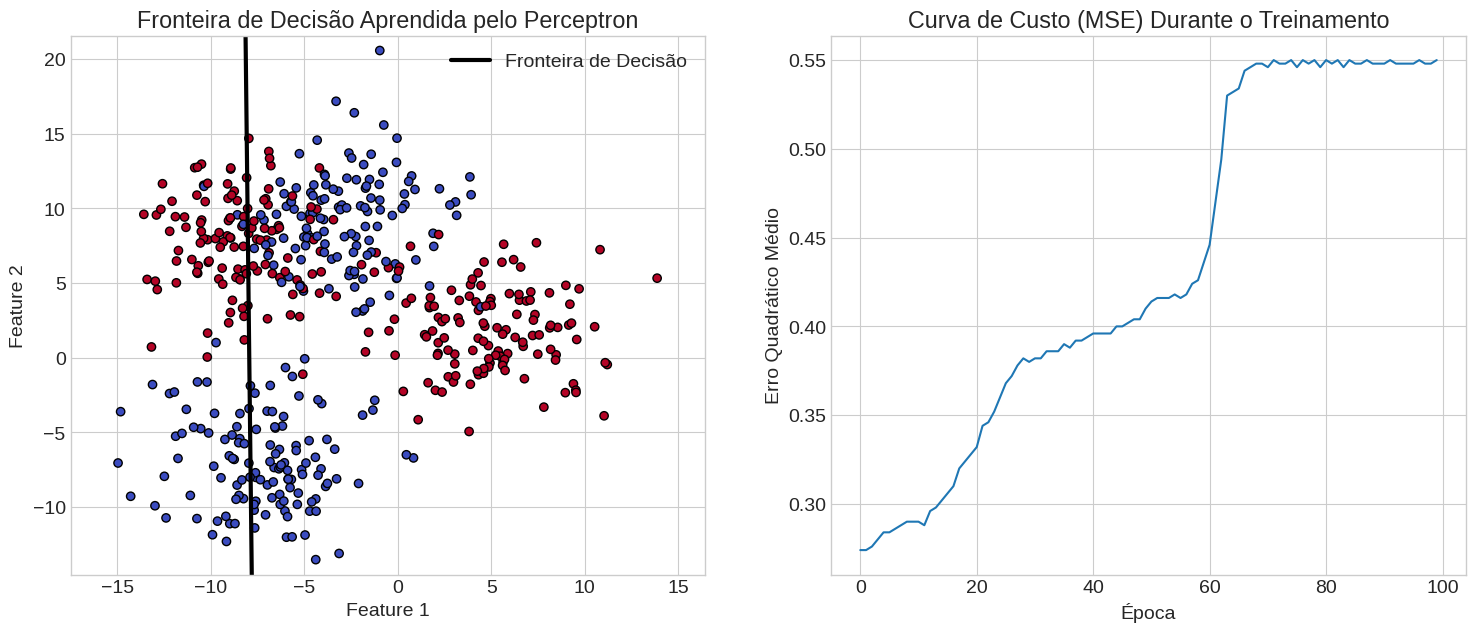

In [ ]:
# Inicialização dos parâmetros
np.random.seed(42)
w = np.random.rand(2) # Pesos para as 2 features
b = np.random.rand(1) # Viés

# Hiperparâmetros
learning_rate = 0.01
epochs = 100

N = len(X)
loss_history = []

# --- Loop de Treinamento ---
for epoch in range(epochs):
    # 1. Calcular a combinação linear
    z = np.dot(X, w) + b

    # 2. Aplicar a função de ativação para obter a predição
    y_hat = step_function(z)

    # 3. Calcular o erro
    error = y - y_hat

    # 4. Calcular o custo (MSE)
    loss = np.mean(error**2)
    loss_history.append(loss)

    # 5. Calcular os gradientes (derivadas do MSE)
    # O fator -1 no erro já está incluso em (y - y_hat), então não precisa do sinal negativo.
    # Para a regra de atualização, a fórmula é w = w + eta * erro * x, que é o que fazemos.
    dw = (1/N) * np.dot(X.T, error)
    db = (1/N) * np.sum(error)

    # 6. Atualizar os parâmetros
    w += learning_rate * dw
    b += learning_rate * db

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss:.4f}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# --- Gráfico 1: Fronteira de Decisão ---
ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

# Desenhar a linha do hiperplano: w1*x1 + w2*x2 + b = 0
# Reescrevendo: x2 = (-w1*x1 - b) / w2
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x_plot = np.linspace(x1_min, x1_max, 100)
y_plot = (-w[0] * x_plot - b) / w[1]

ax1.plot(x_plot, y_plot, 'k-', linewidth=3, label='Fronteira de Decisão')
ax1.set_title('Fronteira de Decisão Aprendida pelo Perceptron')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend()
ax1.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

# --- Gráfico 2: Curva de Custo ---
ax2.plot(range(epochs), loss_history)
ax2.set_title('Curva de Custo (MSE) Durante o Treinamento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Erro Quadrático Médio')

plt.show()

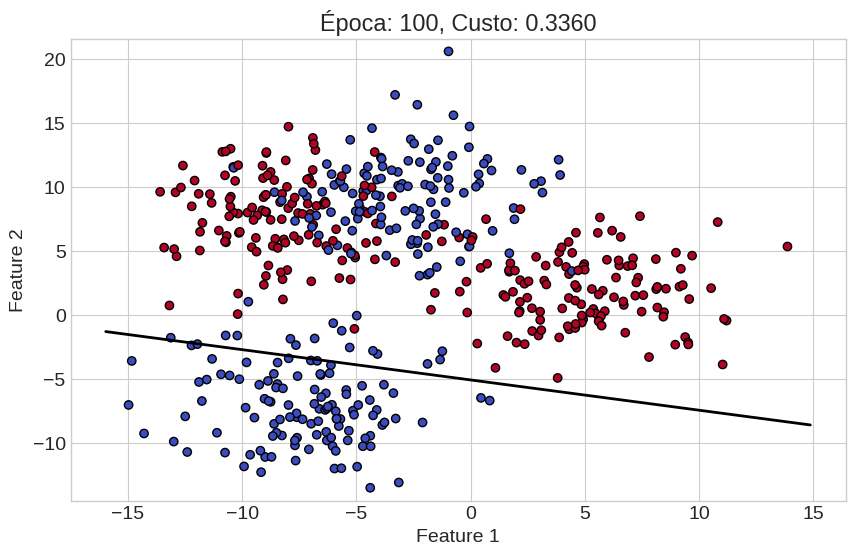

In [ ]:
# Re-inicializar os parâmetros
w_anim = np.random.rand(2)
b_anim = np.random.rand(1)

fig_anim, ax_anim = plt.subplots(figsize=(10, 6))

for epoch in range(epochs):
    z = np.dot(X, w_anim) + b_anim
    y_hat = step_function(z)
    error = y - y_hat
    loss = np.mean(error**2)

    dw = (1/N) * np.dot(X.T, error)
    db = (1/N) * np.sum(error)

    w_anim += learning_rate * dw
    b_anim += learning_rate * db

    # Atualizar o gráfico a cada 5 épocas
    if (epoch + 1) % 5 == 0:
        ax_anim.clear()
        ax_anim.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

        x_plot_anim = np.linspace(x1_min, x1_max, 100)
        y_plot_anim = (-w_anim[0] * x_plot_anim - b_anim) / w_anim[1]
        ax_anim.plot(x_plot_anim, y_plot_anim, 'k-', linewidth=2)

        ax_anim.set_title(f'Época: {epoch+1}, Custo: {loss:.4f}')
        ax_anim.set_xlabel('Feature 1')
        ax_anim.set_ylabel('Feature 2')
        ax_anim.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

        display.display(fig_anim)
        display.clear_output(wait=True)
        time.sleep(0.1)